<a href="https://colab.research.google.com/github/Rohit5950/WALMART-CASE-STUDY/blob/main/walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm,binom,geom,t,ttest_ind,ttest_1samp,ttest_rel,chi
from scipy.stats import f, f_oneway
from scipy.stats import poisson


In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2024-07-08 11:42:32--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.64.229.172, 18.64.229.91, 18.64.229.71, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.64.229.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.5’

walmart_data.csv?16 100%[===================>]  21.96M   133MB/s    in 0.2s    

2024-07-08 11:42:32 (133 MB/s) - ‘walmart_data.csv?1641285094.5’ saved [23027994/23027994]



In [ ]:
data = pd.read_csv("walmart_data.csv?1641285094.1")

# **Exploring Data And Modification**

In [ ]:
data.shape

(550068, 10)

**There are about 550068 row of data containing 10 stastical columns each**

In [ ]:
data.ndim

2

**It is 2 dimentional data**

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
519264,1001936,P00178642,M,36-45,0,C,1,0,5,7186
12267,1001847,P0095142,M,18-25,4,C,2,0,2,3807
20829,1003301,P00319342,F,26-35,2,B,3,0,5,6949
500790,1005111,P00067942,M,36-45,2,B,1,1,5,6853
415134,1003876,P00351142,M,26-35,0,C,3,0,1,7695


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
for i in data.columns[:-1]:
 data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


# **Changing the Marital status to married and unmarried to avoid confusion**

In [ ]:
data.replace({"Marital_Status": {0 : "Married", 1 : "Unmarried"}}, inplace = True)

In [ ]:
data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Married,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Married,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Married,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Married,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Married,8,7969


In [ ]:
data.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [ ]:
data.describe(include = "category")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Married,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Insights**

1. **User_ID** - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. **Product_ID** - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller , with a maximum of 1,880 units sold.

3. **Gender** - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. **Age** - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. **Stay_In_Current_City_Years** - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. **Marital_Status** - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customer

# **Null Values Detection And Outliers**

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**There is no null values present in the dataset**

#**Non Geographical Analysis**



In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
data["Gender"].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [ ]:
data["Age"].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [ ]:
data["City_Category"].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [ ]:
data["Stay_In_Current_City_Years"].value_counts()

Stay_In_Current_City_Years
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: count, dtype: int64

In [ ]:
data["Marital_Status"].value_counts()

Marital_Status
Married      324731
Unmarried    225337
Name: count, dtype: int64

In [ ]:
data["Product_Category"].value_counts()

Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64

#**Insights on non-graphical analysis**

1. **Most of the people in this data are Male, Unmarried**

2. **Majority of people are from "26-35" age group which represent the youth**

3. **Most frequent purchased product category are of 5, 1, and 8
People stay in the city mostly for one or two years**


In [ ]:
for i in data.columns:
  print(i, " : ", data[i].unique(),"\n")

User_ID  :  [1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040] 

Product_ID  :  ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942'] 

Gender  :  ['F', 'M']
Categories (2, object): ['F', 'M'] 

Age  :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

Occupation  :  [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20] 

City_Category  :  ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C'] 

Stay_In_Current_City_Years

#**Outlier Detection**

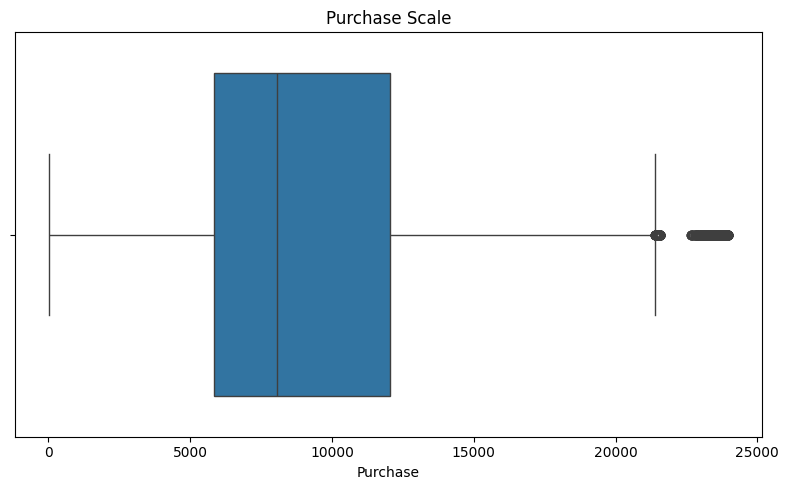

In [ ]:
# PLotting the figure size
plt.figure(figsize=(8, 5))

# Plotting the boxplot
sns.boxplot(data['Purchase'],orient="h")
plt.title("Purchase Scale")
plt.tight_layout()

# Showing the figure
plt.show()


In [ ]:
Q1 = np.percentile(data['Purchase'],25)
Q3 = np.percentile(data['Purchase'],75)
IQR = Q3 - Q1
left_whisker = Q1 - (1.5 * IQR)
right_whisker = Q3 + (1.5 * IQR)
print("Left Whisker = ",left_whisker)
print("Q1 = ",Q1)
print("IQR = ",IQR)
print("Q3 = ",Q3)
print("Right Whisker = ",right_whisker)

Left Whisker =  -3523.5
Q1 =  5823.0
IQR =  6231.0
Q3 =  12054.0
Right Whisker =  21400.5


In [ ]:
data_LeftOutliers = data[data['Purchase']<left_whisker]
data_RightOutliers = data[data['Purchase']>right_whisker]
total = data_LeftOutliers['Purchase'].count() + data_RightOutliers['Purchase'].count()
print("Total number of Outliers : ",total)

Total number of Outliers :  2677


In [ ]:
print("Median: ",data['Purchase'].median(),"\nMean: ",data['Purchase'].mean())

Median:  8047.0 
Mean:  9263.968712959126


#**Insights**

# * Outliers
* There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the
importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

#* Distribution

* Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD , with the median purchase amount being 8,047 USD .
The lower limit of 12 USD while the upper limit of 21,399 USD reveal significant variability in customer spending
As median is less than mean which tells that the distribution is Right Skewed.

# **Univarient Analysis**


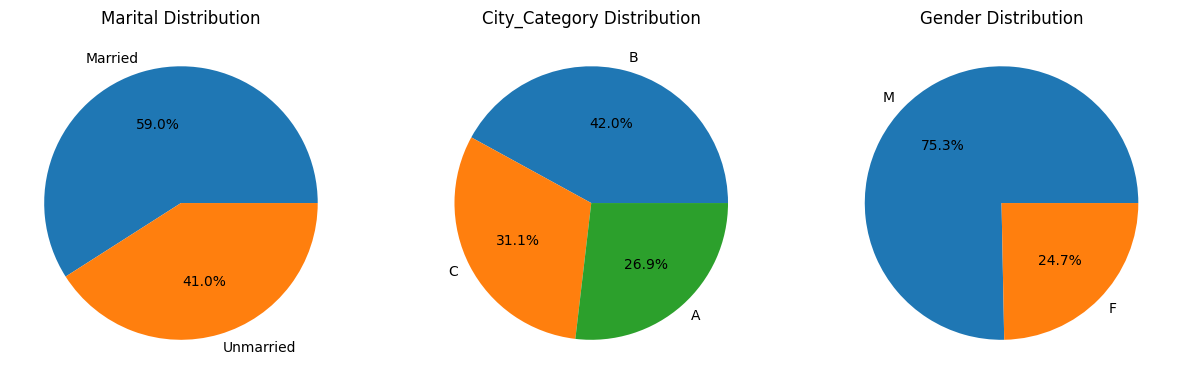

In [ ]:
# Plotting the figure size
plt.figure(figsize=(15,20))

# Plotting the axis
plt.subplot(1,3,1)

# Potting the graph
plt.pie(data['Marital_Status'].value_counts(),labels=data['Marital_Status'].value_counts().index,autopct = '%.1f%%')
plt.title('Marital Distribution')
plt.subplot(1,3,2)
plt.pie(data['City_Category'].value_counts(),labels=data['City_Category'].value_counts().index,autopct = '%.1f%%')
plt.title('City_Category Distribution')
plt.subplot(1,3,3)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct = '%.1f%%')
plt.title('Gender Distribution')

# Showing the graph
plt.show()


#**Insights**

1. **Gender Distribution** - Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.
2. **Marital Status** - Given that unmarried customers account for a higher percentage of transactions, it may be worthwhile to consider specific marketing campaigns or promotions that appeal to this group.

3. **City Category** - City B saw the most number of transactions followed by City C and City A respectively

In [ ]:
category = ['Age','Occupation', 'Stay_In_Current_City_Years', 'Product_Category']


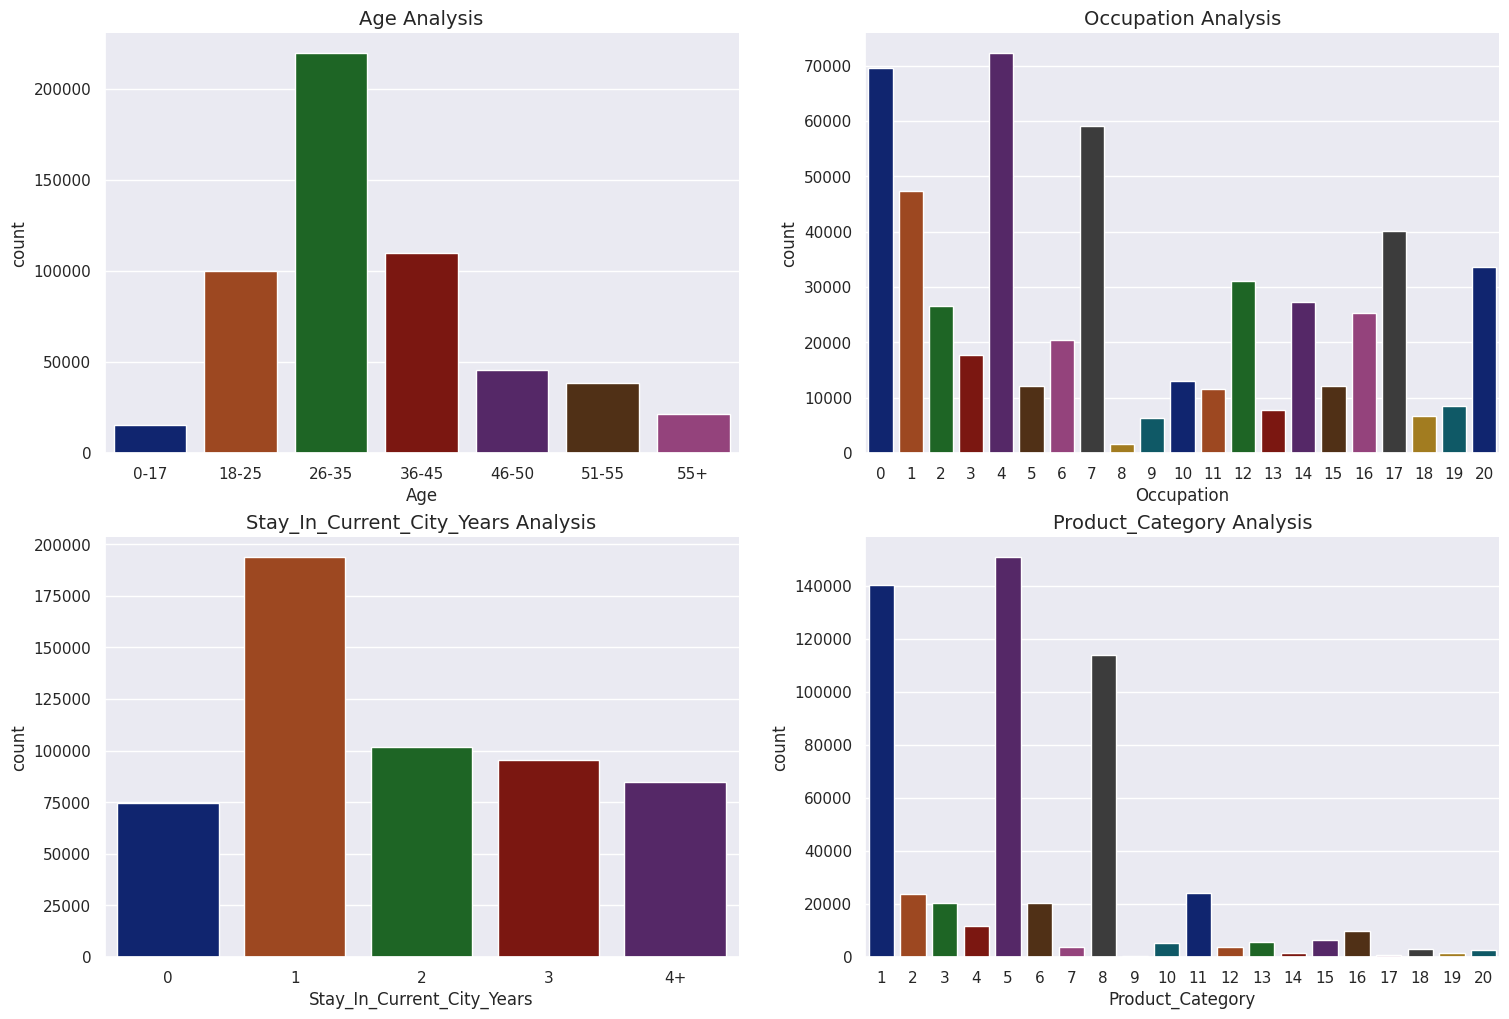

In [ ]:
plt.figure(figsize=(18,12))
sns.set(style='darkgrid')

# Plot each categorical column
for i, col in enumerate(category[:2], 1):
 plt.subplot(2, 2, i)
 sns.countplot(data=data, x=col, hue=col, palette='dark', legend=False)
 sns.despine()
 plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')
for i, col in enumerate(category[2:], 3):
 plt.subplot(2, 2, i)
 sns.countplot(data=data, x=col, hue=col,palette='dark', legend=False)
 sns.despine()
 plt.title(f'{col} Analysis', fontsize=14, fontfamily='sans-serif')

# Show the plot
plt.show()

#**Insights:**

**Age Group Distribution:-**

1. The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-agedadults are the most active and interested in
shopping for deals and discounts .

2. 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a diverse customer base that covers different life stages and
preferences.

3. The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments , with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product. offerings to attract more customers from these age groups, especially the seniors and the children.

#**Occupation Analysis:-**
Occupation '4' has the highest count, suggesting that customers with occupation '4' have the highest representation in the dataset. Occupations '0', '7', and '1' also have significant counts.

#**City Residence Duration Impact:-**

1. Customers who have stayed in their current city for more than 1 year show a higher purchase tendency, suggesting a positive correlation between the duration of stay and purchasing
behavior. The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.
2. The majority of the customers (49%) have stayed in the current city for one year or less . This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping
options.
3. 4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.
4. The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for loyalty programs and promotions.

#**Product Category Purchase Analysis:-**
Product categories '1' and '5' followed by '8' exhibit higher purchase amounts, indicating that these categories contribute significantly to the overall sales revenue.


# **Top 10**

In [ ]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Married,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Married,1,15200


In [ ]:
Top_10_product=  data["Product_ID"].value_counts()[:10]
Top_10_product_category = data["Product_Category"].value_counts()[:10]
Top_10_occupation = data["Occupation"].value_counts()[:10]

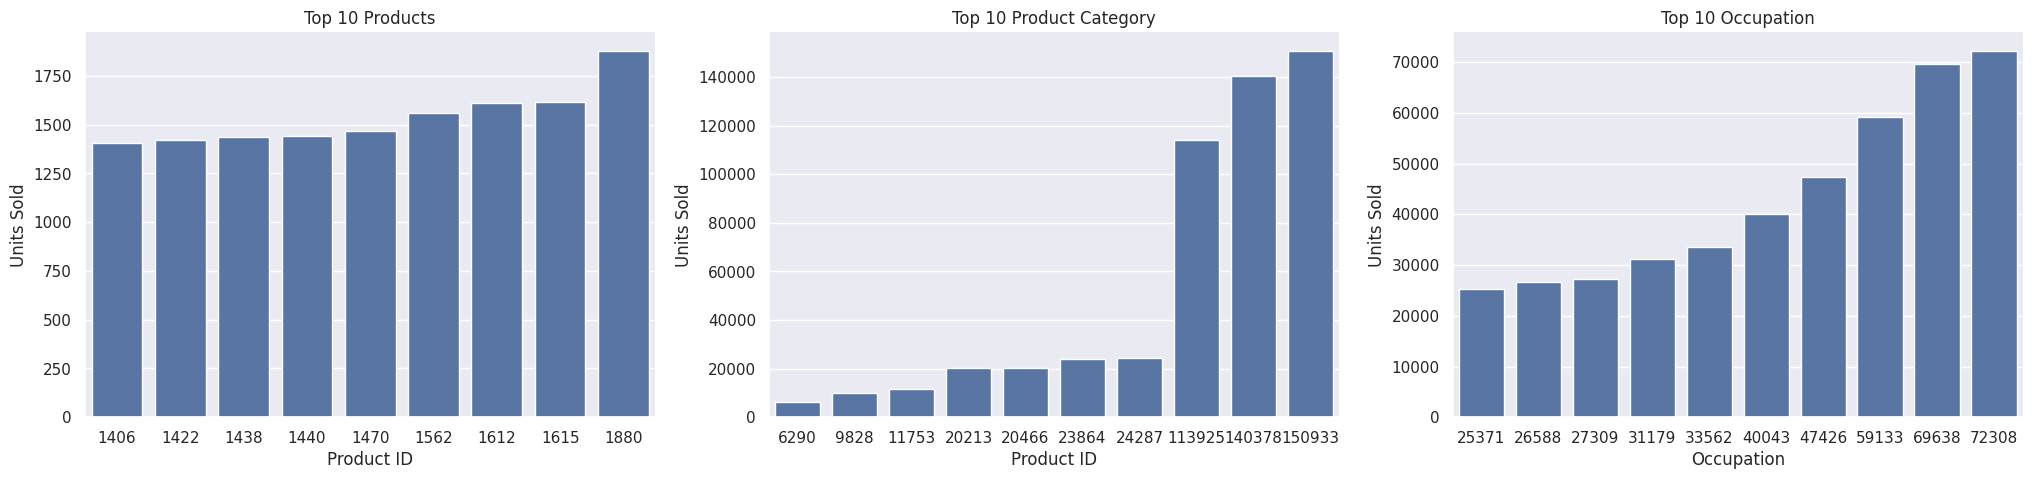

In [ ]:
# Plotting the figure size

plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)

# Plotting the graph

sns.barplot(x=Top_10_product,y=Top_10_product.values)
plt.title('Top 10 Products')
plt.xlabel('Product ID')
plt.ylabel('Units Sold')
sns.despine()
plt.subplot(1, 3, 2)
sns.barplot(x=Top_10_product_category,y=Top_10_product_category.values)
plt.title('Top 10 Product Category')
plt.xlabel('Product ID')
plt.ylabel('Units Sold')
sns.despine()
plt.subplot(1, 3, 3)
sns.barplot(x=Top_10_occupation,y=Top_10_occupation.values)
plt.title('Top 10 Occupation')
plt.xlabel('Occupation')
plt.ylabel('Units Sold')
sns.despine()

# Show the plots

plt.show()

#**Insights**

1. **Top 10 Products Sold -**
The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers, suggesting that Walmart offers a variety of products that many
different customers like to buy.

2. **Top 10 Product Categories -** Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.

3. Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have
more disposable income to spend on Black Friday

# **Bivariate Analysis**

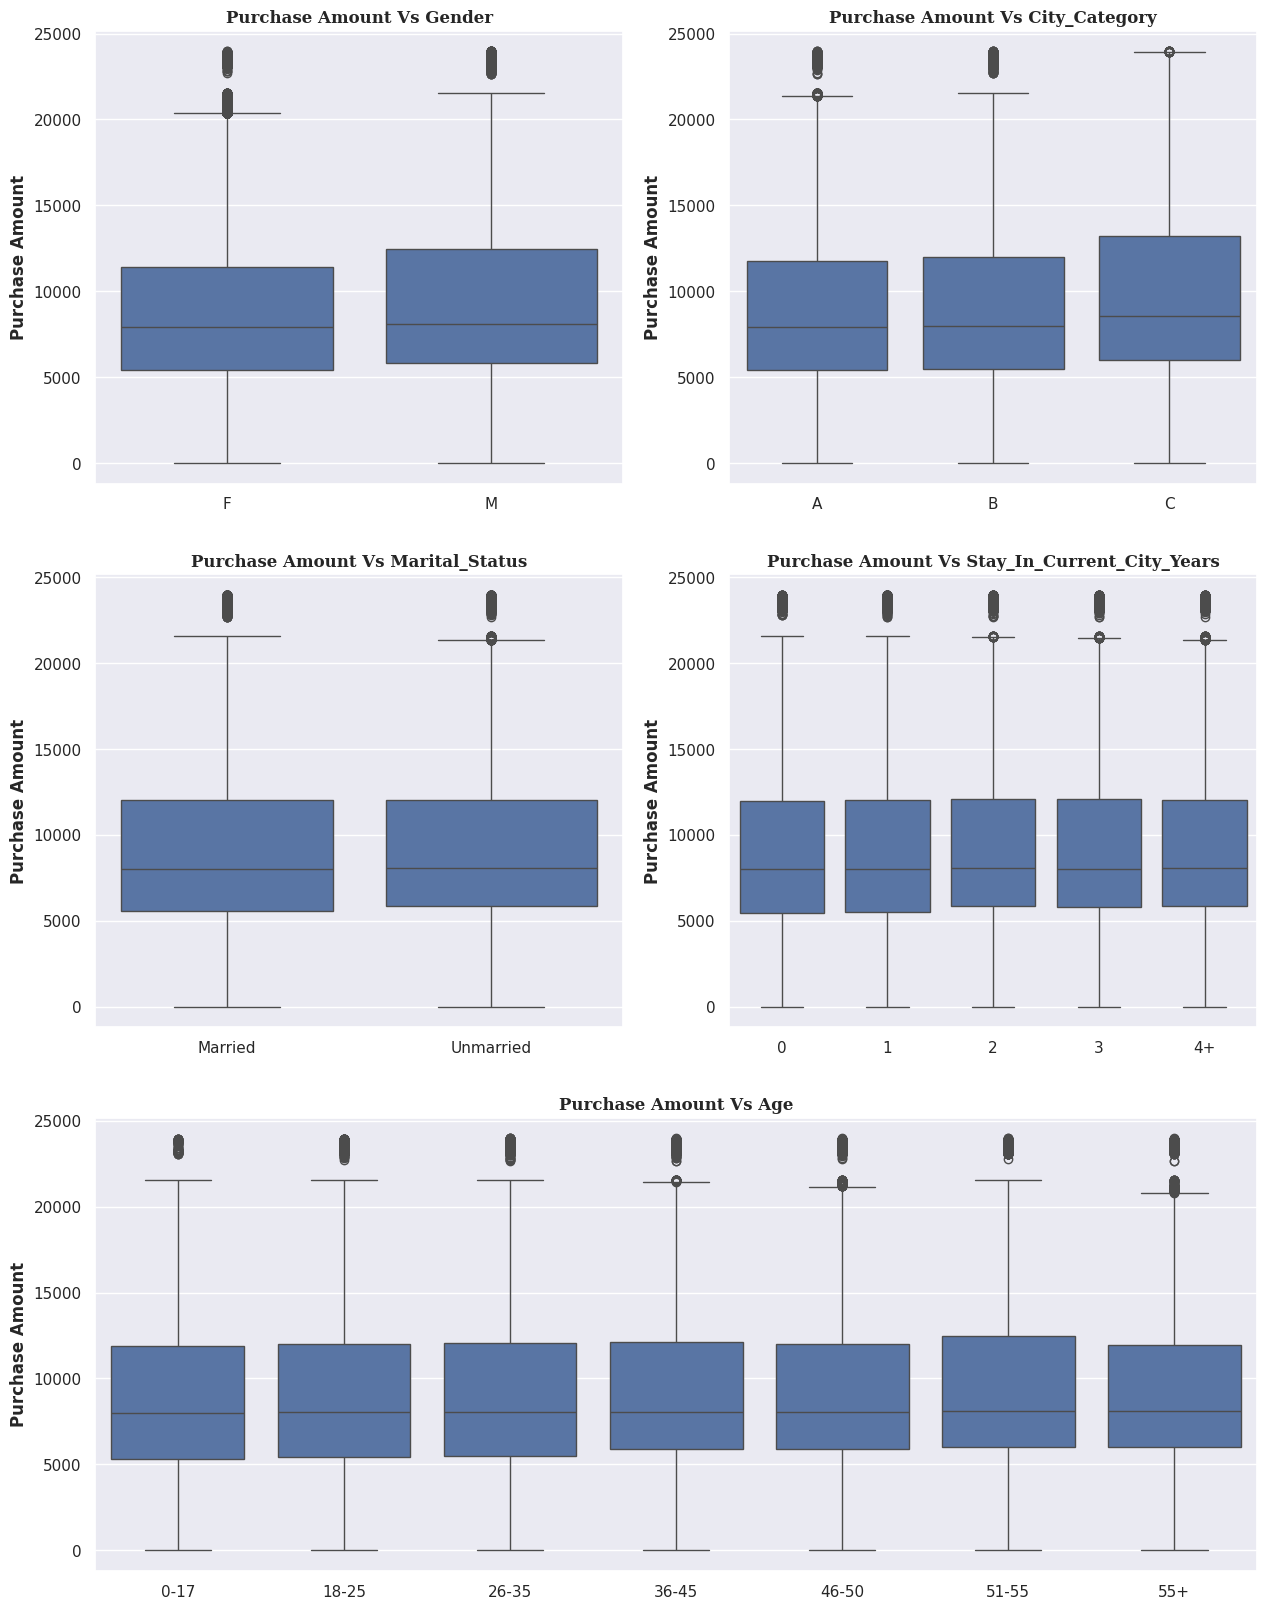

In [ ]:
# Plotting the figure size

fig = plt.figure(figsize = (15,20))
plt.subplot(3,2,1)

# Plotting the axis and graph

sns.boxplot(data=data,x="Gender",y='Purchase')
plt.title(f'Purchase Amount Vs Gender',{'font':'serif', 'size':12,'weight':'bold'})
plt.ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
plt.xlabel('')

plt.subplot(3,2,2)
sns.boxplot(data=data,x="City_Category",y='Purchase')
plt.title(f'Purchase Amount Vs City_Category',{'font':'serif', 'size':12,'weight':'bold'})
plt.ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
plt.xlabel('')

plt.subplot(3,2,3)
sns.boxplot(data=data,x="Marital_Status",y='Purchase')
plt.title(f'Purchase Amount Vs Marital_Status',{'font':'serif', 'size':12,'weight':'bold'})
plt.ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
plt.xlabel('')

plt.subplot(3,2,4)
sns.boxplot(data=data,x="Stay_In_Current_City_Years",y='Purchase')
plt.title(f'Purchase Amount Vs Stay_In_Current_City_Years',{'font':'serif', 'size':12,'weight':'bold'})
plt.ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
plt.xlabel('')

plt.subplot(3,1,3)
sns.boxplot(data=data,x="Age",y='Purchase')
plt.title(f'Purchase Amount Vs Age',{'font':'serif', 'size':12,'weight':'bold'})
plt.ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
plt.xlabel('')

# Show the plot
plt.show()


#**Insights:-**

Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As indicated in the data, the median purchase amount
consistently hovers around 8,000 USD , regardless of the specific variable being examined.

# **CLT and Confidence Interval**


# For 100 sample

In [ ]:
female=pd.Series(data.loc[data["Gender"]=="F"]["Purchase"])
male=pd.Series(data.loc[data["Gender"]=="M"]["Purchase"])

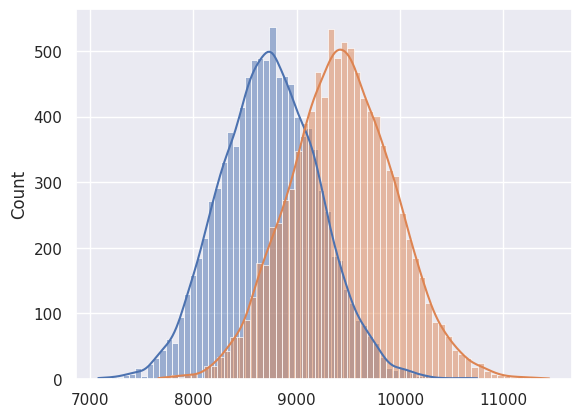

In [ ]:
female_clt=[]
fem_samp_100= np.random.choice(female,size=100)
for i in range(10000):
 female_clt.append(np.mean(np.random.choice(female,size=100)))

male_clt=[]
m_samp_100= np.random.choice(male,size=100)
for i in range(10000):
 male_clt.append(np.mean(np.random.choice(male,size=100)))

sns.histplot(female_clt,kde=True)
sns.histplot(male_clt,kde=True)

plt.show()

In [ ]:
print("Confidence Interval by taking 100 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_100),scale=np.std(fem_samp_100)))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_100),scale= np.std(m_samp_100)))

Confidence Interval by taking 100 customer at 95%
female:  (-453.2197079979833, 17754.71970799798)
male:  (817.2900349228712, 18039.14996507713)


#**Insight:-**
**for 100 sample means the purchases of male and female are
overlapping**

# **For 500 sample**

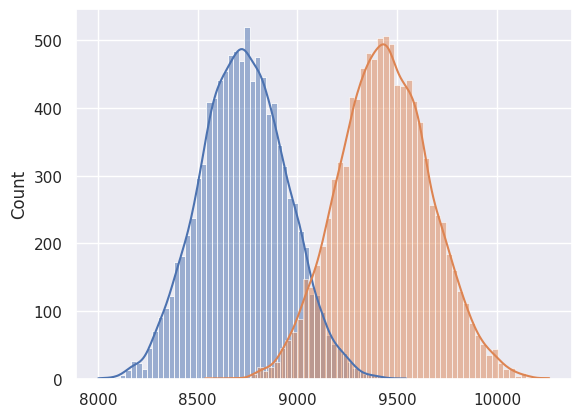

In [ ]:
female_clt1=[]
fem_samp_500=np.random.choice(female,size=500)
for i in range(10000):
 female_clt1.append(np.mean(np.random.choice(female,size=500)))

male_clt1=[]
m_samp_500=np.random.choice(female,size=500)
for i in range(10000):
  male_clt1.append(np.mean(np.random.choice(male,size=500)))

sns.histplot(female_clt1,kde=True)
sns.histplot(male_clt1,kde=True)

plt.show()


In [ ]:
print("Confidence Interval by taking 500 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_500),scale=np.std(fem_samp_500)))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_500),scale=np.std(m_samp_500)))

Confidence Interval by taking 500 customer at 95%
female:  (-449.0969228320646, 17245.380922832064)
male:  (-632.0073986310708, 17468.99139863107)


#**Insight:-**
**for 500 sample means the purchases of male and female are
overlapping**

# **For 1000 Sample**

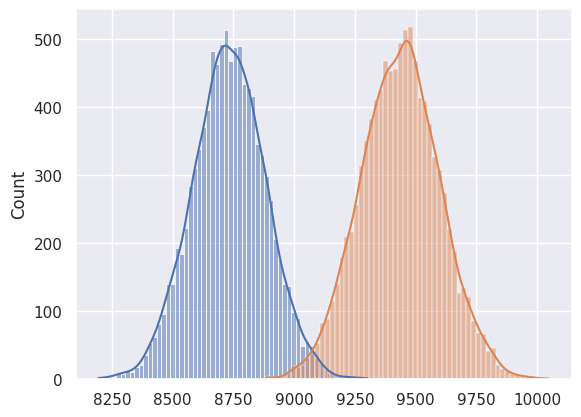

In [ ]:
female_clt2=[]
fem_samp_1000=np.random.choice(female,size=1000)
for i in range(10000):
 female_clt2.append(np.mean(np.random.choice(female,size=1000)))

male_clt2=[]
m_samp_1000=np.random.choice(male,size=1000)
for i in range(10000):
 male_clt2.append(np.mean(np.random.choice(male,size=1000)))

sns.histplot(female_clt2,kde=True)
sns.histplot(male_clt2,kde=True)

plt.show()

In [ ]:
print("Confidence Interval by taking 1000 customer at 95%")
print("female: ", norm.interval(0.95,loc=np.mean(fem_samp_1000),scale=np.std(fem_samp_1000)))
print("male: ", norm.interval(0.95,loc=np.mean(m_samp_1000),scale=np.std(m_samp_1000)))

Confidence Interval by taking 1000 customer at 95%
female:  (-853.4248652515435, 17899.554865251543)
male:  (-684.1146085971977, 19266.9066085972)


# **Insight:-**

**For 1000 sample the confidence interval of female is
(8384.924851716494, 9156.131148283506) and for male is
(9249.348879883803, 10103.041120116197) at 99%**

# **By Using T Test**

In [ ]:
H0="There is no difference in average purchasing range of male and female"
Ha="Female has less average purchasing range than male"
Alpha=0.01

T_stat,p_val= ttest_ind(fem_samp_1000,m_samp_1000,alternative="less")
print("t statistics: ", T_stat,"p value: ", p_val)
if p_val>Alpha:
 print(H0)
else:
 print(Ha)


t statistics:  -3.476645133086782 p value:  0.00025929085265018165
Female has less average purchasing range than male


# **Purchase Vs Marital Status**

In [ ]:
married=pd.Series(data.loc[data["Marital_Status"]=="Married"]["Purchase"])
unmarried=pd.Series(data.loc[data["Marital_Status"]=="Unmarried"]["Purchase"])

In [ ]:
np.mean(married)


9265.907618921507

In [ ]:
np.mean(unmarried)


9261.174574082374

# **For 100 Sample**

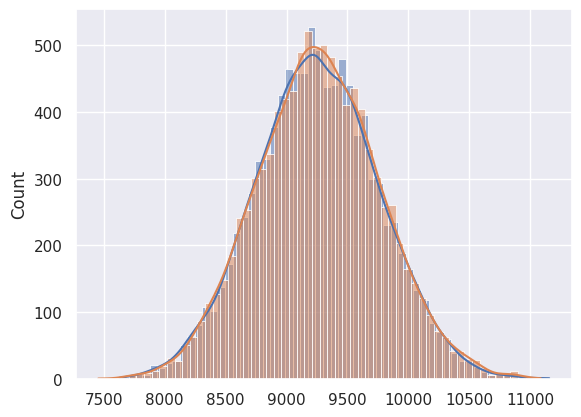

In [ ]:
unmar_clt=[]
unmar_samp_100=np.random.choice(unmarried,size=100)
for i in range(10000):
 unmar_clt.append(np.mean(np.random.choice(unmarried,size=100)))

mar_clt=[]
unmar_samp_100=np.random.choice(married,size=100)
for i in range(10000):
 mar_clt.append(np.mean(np.random.choice(married,size=100)))

sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)

plt.show()


# **For 1000 Sample**

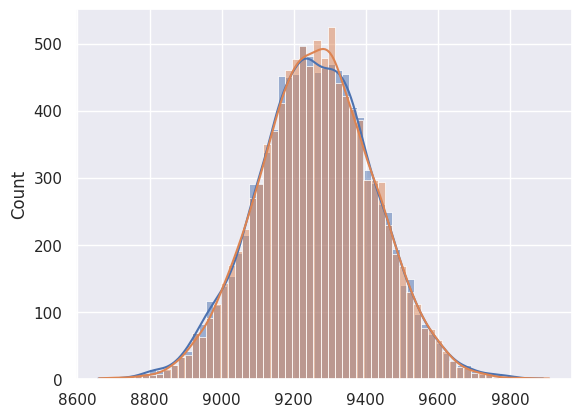

In [ ]:
unmar_clt=[]
unmar_samp_1000=np.random.choice(unmarried,size=1000)
for i in range(10000):
  unmar_clt.append(np.mean(np.random.choice(unmarried,size=1000)))

mar_clt=[]
unmar_samp_1000=np.random.choice(married,size=1000)
for i in range(10000):
 mar_clt.append(np.mean(np.random.choice(married,size=1000)))

sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)

plt.show()


# **Insights:-**

**As seen in the above graph the average purchase means of
Married and Unmarried are strongly overlapping even after
taking 1000 samples.**

# **Business Recommendation**

1. **Targeted Marketing Strategies**

**Male Shoppers:**

* Develop marketing campaigns focusing on male-dominated products.
Offer exclusive deals or bundles for electronics, sports equipment, and other popular male-oriented items.
Female Shoppers:
* Enhance product offerings with competitive pricing for female-oriented products.
Create special promotions for women's clothing, beauty products, and household items.

2. **Age-Specific Initiatives**

**26-45 Age Group:**

* Curate product selections and promotions tailored to this demographic’s preferences.

* Offer loyalty programs with benefits that appeal to this age group, such as family-oriented rewards or tech product discounts.

#**Younger Shoppers (0-17):**

* Introduce special youth discount days or back-to-school promotions.
Collaborate with brands that resonate with younger consumers to create exclusive product lines.

#**51-55 Age Group:**

Provide premium services such as personalized shopping assistants or exclusive shopping hours.
Develop loyalty programs with high-value rewards and personalized offers.

#3. **Enhancing Customer Experience**

**Segmentation Opportunities:**

* Segment marketing efforts to cater to distinct spending behaviors.
Use data analytics to personalize marketing messages and product recommendations.

**Customer Service:**

* Improve in-store customer service with knowledgeable staff to assist different demographic groups.
Implement feedback mechanisms to continually improve the shopping experience.

#4. **Innovative Pricing and Promotion Tactics**

**Pricing Strategies:**

* Implement dynamic pricing strategies that offer competitive pricing on high-demand items.

* Offer tiered discounts that encourage higher spending thresholds.

#**Promotional Campaigns:**

* Run flash sales or limited-time offers to create urgency and drive purchases.

* Use targeted digital advertising to reach specific customer segments with tailored offers.

#5. **Consistent Shopping (Customer Rating)**

* While Company is making shopping better for different groups, it’s important to make sure that everyone has a good shopping experience, no matter who they are.